*<p align="center">Data Scientist Internship At Unified Mentor Private Limited</p>*

# <p align="center">**|<●>|Analyze and model 'Data Science Job Salaries' to uncover trends,<br> identify salary based on job-related factors.|<●>|** </p> 


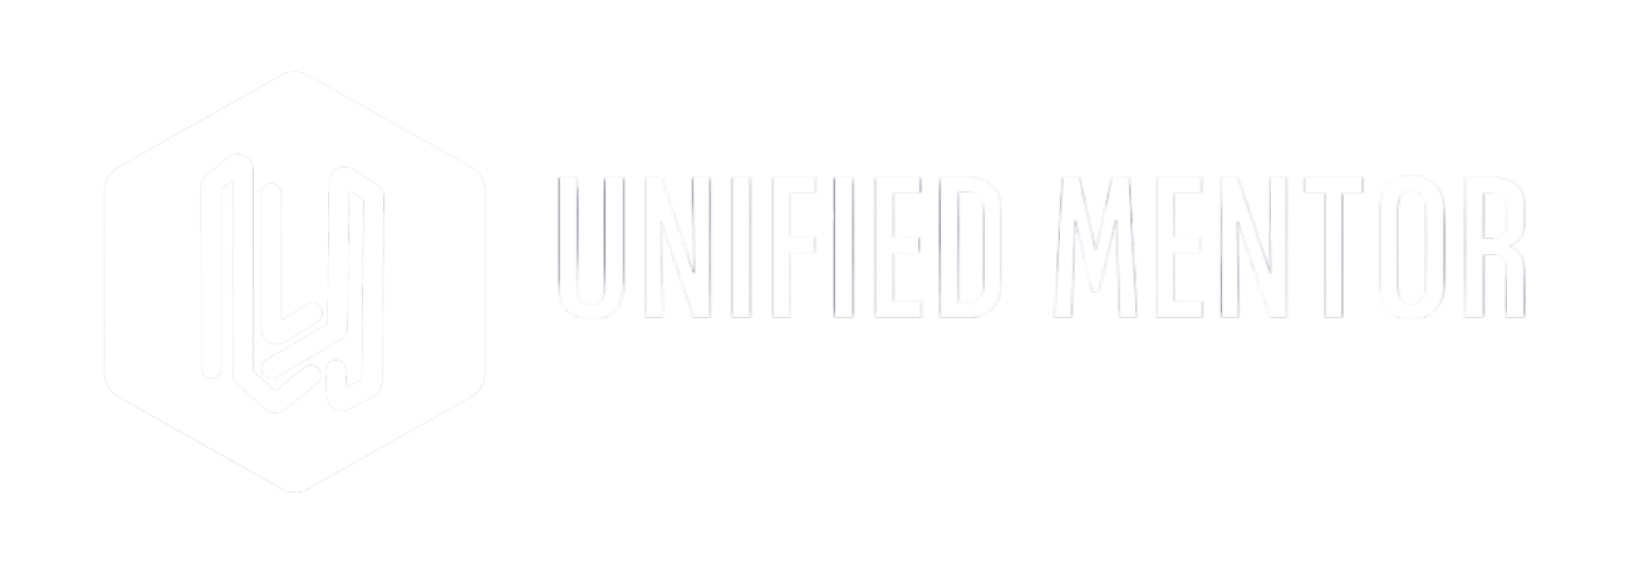

## **Done By-** ***Rajat Sanjay Potgantiwar***
 **Contact Me:**

- 📧 [Email-id](mailto:rajatpotgantiwar@gmail.com)
- 🌐 [LinkedIn](https://www.linkedin.com/in/rajatpotgantiwar/)
- 💻 [GitHub](https://github.com/mrrajat10)

## **Step-1->Loading and Understanding The Data:**

In [ ]:
#importing all required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
import streamlit as st
import country_converter  


In [4]:
# Setting up workspace
%matplotlib inline

import warnings
import pandas as pd

# Ignore warnings
warnings.filterwarnings("ignore")

# Display up to 500 columns in pandas DataFrames
pd.set_option('display.max_columns', 500)

In [5]:
## Loading 

file_path =r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\Data Science Job Salaries.csv"
data=pd.read_csv(file_path)
#basic info
print(data.info())
#top 5 rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE    

## **Step-2->Data Cleaning , Handling Missing Values And Standardize:**


In [6]:
# Check for missing values 
print(data.isnull().sum()) 



Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
# Fill missing values (example strategies) 
# Replace with median 
data['salary_in_usd'].fillna(data['salary_in_usd'].median(), inplace=True)


In [8]:
#replace with median
data['company_size'].fillna('Unknown', inplace=True)


In [9]:
# Drop rows with critical missing data 
data.dropna(subset=['job_title', 'experience_level'], inplace=True) 


In [10]:
# Verify no missing values remain 
print(data.isnull().sum()) 


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [11]:
# Standardize text case for categorical columns 
data['job_title'] = data['job_title'].str.lower()
data['company_size'] = data['company_size'].str.capitalize() 
# Verify unique values 
print(data['job_title'].unique()) 
print(data['company_size'].unique())


['data scientist' 'machine learning scientist' 'big data engineer'
 'product data analyst' 'machine learning engineer' 'data analyst'
 'lead data scientist' 'business data analyst' 'lead data engineer'
 'lead data analyst' 'data engineer' 'data science consultant'
 'bi data analyst' 'director of data science' 'research scientist'
 'machine learning manager' 'data engineering manager'
 'machine learning infrastructure engineer' 'ml engineer' 'ai scientist'
 'computer vision engineer' 'principal data scientist'
 'data science manager' 'head of data' '3d computer vision researcher'
 'data analytics engineer' 'applied data scientist'
 'marketing data analyst' 'cloud data engineer' 'financial data analyst'
 'computer vision software engineer' 'director of data engineering'
 'data science engineer' 'principal data engineer'
 'machine learning developer' 'applied machine learning scientist'
 'data analytics manager' 'head of data science' 'data specialist'
 'data architect' 'finance data anal

## **Step-03->Feature Engineering:**
1. Encode Categorical Variables: Convert experience_level, employment_type, etc., to numeric. 
2. Add Derived Features: 
○ Calculate salary differences between locations (employee_residence vs company_location).<br> 
○ Group salaries by company_size and remote_ratio. 

In [12]:
# Encoding categorical variables 

data['experience_level'] = data['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})

data['employment_type'] = data['employment_type'].map({'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3})

# Adding a salary ratio feature 
data['salary_ratio'] = data['salary'] / data['salary_in_usd'] 
# Group salaries by company size 
grouped_salary = data.groupby('company_size')['salary_in_usd'].mean() 
print(grouped_salary)
print(data.head())

company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64
   Unnamed: 0  work_year  experience_level  employment_type  \
0           0       2020                 1                1   
1           1       2020                 2                1   
2           2       2020                 2                1   
3           3       2020                 1                1   
4           4       2020                 2                1   

                    job_title  salary salary_currency  salary_in_usd  \
0              data scientist   70000             EUR          79833   
1  machine learning scientist  260000             USD         260000   
2           big data engineer   85000             GBP         109024   
3        product data analyst   20000             USD          20000   
4   machine learning engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  salary_ratio  
0

## **Step-04-> Exploratory Data Analysis (EDA):**

**4.1  Summary Statistics:**

In [13]:
# Summary statistics 
print(data.describe()) 


       Unnamed: 0    work_year  experience_level  employment_type  \
count  607.000000   607.000000        607.000000       607.000000   
mean   303.000000  2021.405272          1.401977         1.004942   
std    175.370085     0.692133          0.785510         0.226121   
min      0.000000  2020.000000          0.000000         0.000000   
25%    151.500000  2021.000000          1.000000         1.000000   
50%    303.000000  2022.000000          2.000000         1.000000   
75%    454.500000  2022.000000          2.000000         1.000000   
max    606.000000  2022.000000          3.000000         3.000000   

             salary  salary_in_usd  remote_ratio  salary_ratio  
count  6.070000e+02     607.000000     607.00000    607.000000  
mean   3.240001e+05  112297.869852      70.92257      7.187409  
std    1.544357e+06   70957.259411      40.70913     38.927754  
min    4.000000e+03    2859.000000       0.00000      0.727026  
25%    7.000000e+04   62726.000000      50.00000     

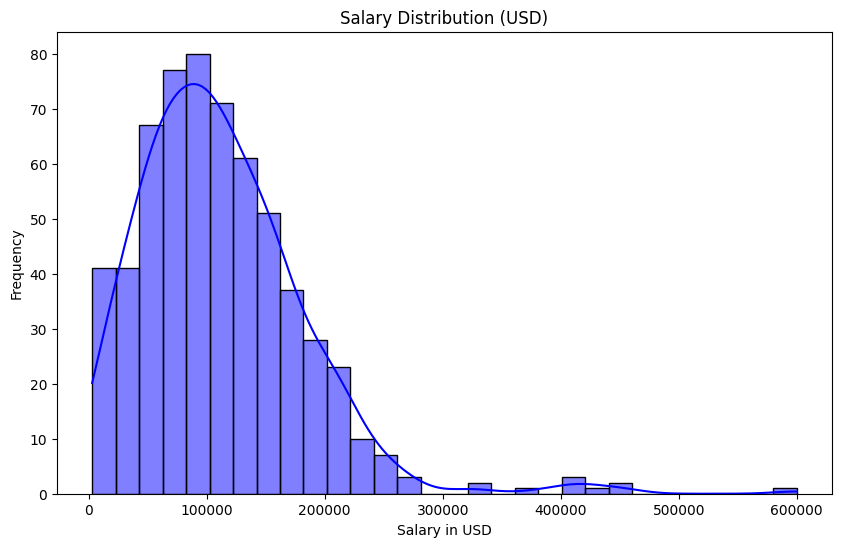

In [14]:
plt.figure(figsize=(10, 6)) 
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='blue') 
plt.title('Salary Distribution (USD)') 
plt.xlabel('Salary in USD') 
plt.ylabel('Frequency') 

plt.show()

**4.2  Correlation Analysis:**

In [15]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_ratio
0,0,2020,1,1,data scientist,70000,EUR,79833,DE,0,DE,L,0.876830
1,1,2020,2,1,machine learning scientist,260000,USD,260000,JP,0,JP,S,1.000000
2,2,2020,2,1,big data engineer,85000,GBP,109024,GB,50,GB,M,0.779645
3,3,2020,1,1,product data analyst,20000,USD,20000,HN,0,HN,S,1.000000
4,4,2020,2,1,machine learning engineer,150000,USD,150000,US,50,US,L,1.000000


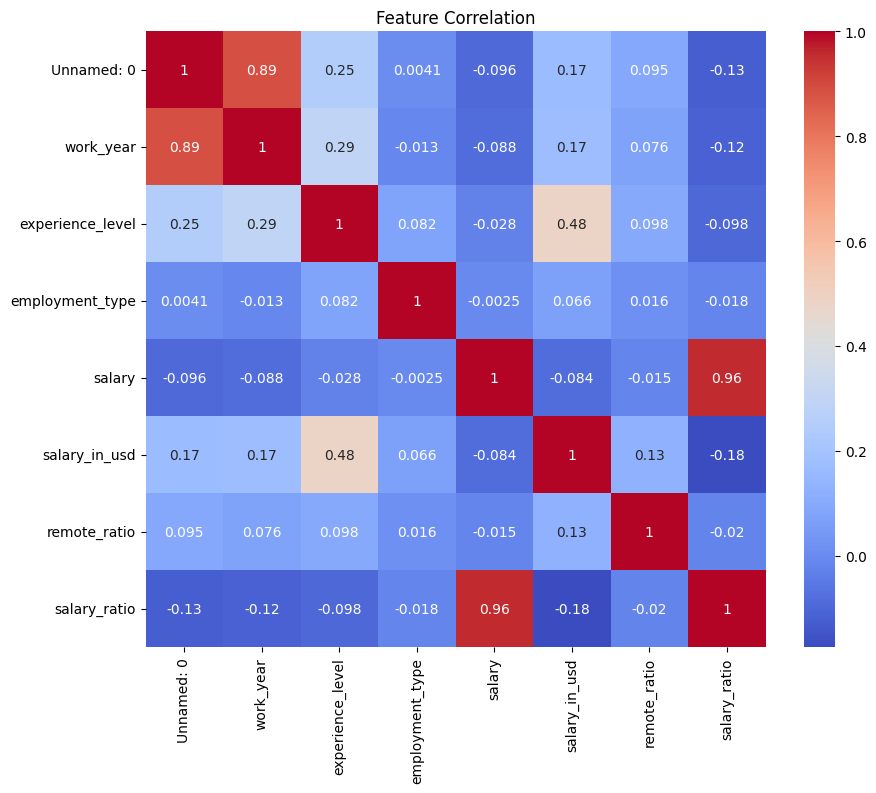

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

**4.3 Category-Based Analysis:**

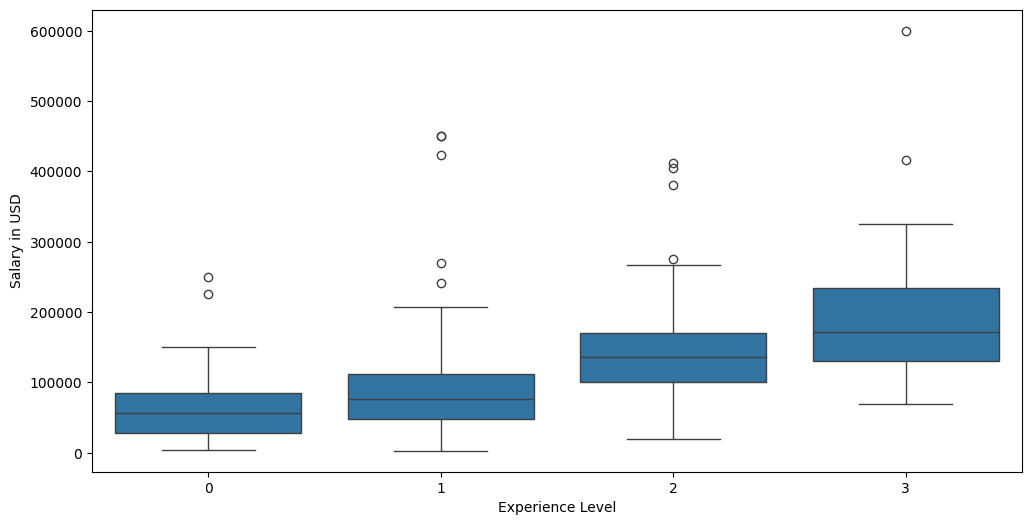

In [17]:
# Boxplot for salaries by experience level 
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='experience_level', y='salary_in_usd', data=data) 	
plt.xlabel('Experience Level') 
plt.ylabel('Salary in USD')
plt.show() 	


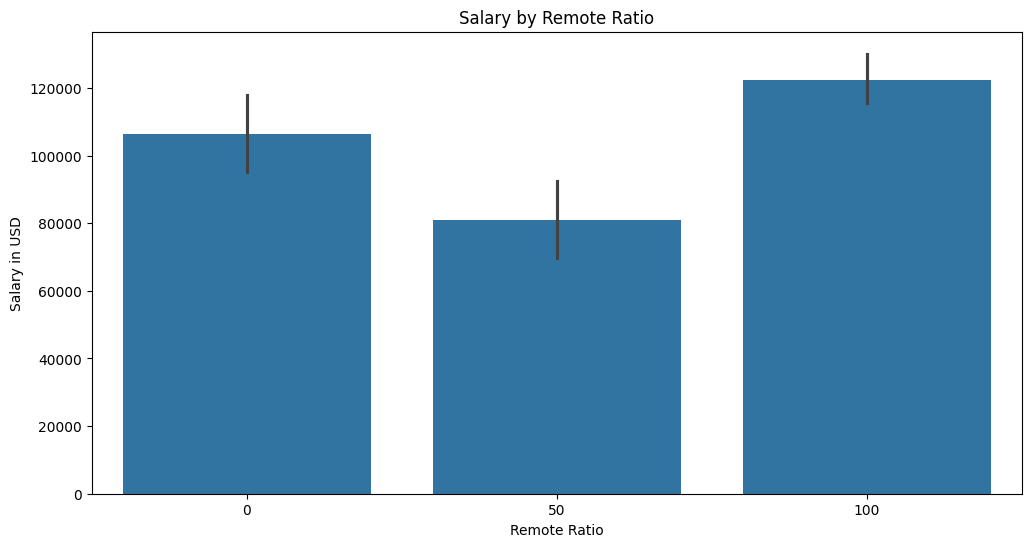

In [18]:
# Remote ratio vs salary 
plt.figure(figsize=(12, 6)) 
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Salary by Remote Ratio') 
plt.xlabel('Remote Ratio') 
plt.ylabel('Salary in USD') 
plt.show()

In [19]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_ratio
0,0,2020,1,1,data scientist,70000,EUR,79833,DE,0,DE,L,0.876830
1,1,2020,2,1,machine learning scientist,260000,USD,260000,JP,0,JP,S,1.000000
2,2,2020,2,1,big data engineer,85000,GBP,109024,GB,50,GB,M,0.779645
3,3,2020,1,1,product data analyst,20000,USD,20000,HN,0,HN,S,1.000000
4,4,2020,2,1,machine learning engineer,150000,USD,150000,US,50,US,L,1.000000


## **Step-05-> Data Visualization For Insights** 


In [20]:
import streamlit as st 
st.title('Data Science Job Salaries') 
# Upload summary statistics 
st.write(data.describe()) 
# Visualization 
st.line_chart(data['salary_in_usd']) 
# Filter by job title 
job_filter = st.selectbox('Select Job Title', data['job_title'].unique()) 
filtered_data = data[data['job_title'] == job_filter]
st.bar_chart(filtered_data['salary_in_usd'])



2025-12-21 15:55:03.161 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 15:55:03.789 
  command:

    streamlit run C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-21 15:55:03.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 15:55:03.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 15:55:03.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 15:55:03.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 15:55:03.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 15:55:08.274 Thre

DeltaGenerator()

In [21]:
# get the dataset 
df = pd.read_csv(r"C:\Users\Admin\Documents\DataScience\Projects\Datasets\Data Science Job Salaries.csv") 
df.head() 


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# remove the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# check shape
df.shape

# check columns and data types
df.dtypes

# detect duplications
df.duplicated().sum()

# drop duplications
df.drop_duplicates(inplace=True)

# change country names from ISO2 to original names
cc = country_converter.CountryConverter()
df['company_location'] = cc.convert(df['company_location'], to='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'], to='name_short')

In [23]:
df.head()    

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L


In [24]:
# map experience level abbreviations to full names
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [25]:
# map employment type abbreviations to full names
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [26]:
# map company size abbreviations to full names
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

In [27]:
# drop salary and salary_currency columns, keep salary_in_usd
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [28]:
# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [29]:
# check work_year distribution
df['work_year'].value_counts()

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64

In [30]:
# rename remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)

In [31]:
# map job_type values
df['job_type'] = df['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid'
})

In [32]:
# check job_type distribution
df['job_type'].value_counts()

job_type
remote    346
onsite    121
hybrid     98
Name: count, dtype: int64

In [33]:
# check final columns
print(df.columns)

# preview dataset
df.head()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')


,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,Germany,onsite,Germany,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,Japan,onsite,Japan,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,United Kingdom,hybrid,United Kingdom,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,Honduras,onsite,Honduras,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,United States,hybrid,United States,Large


Text(0.5, 1.0, 'Salary Distribution')

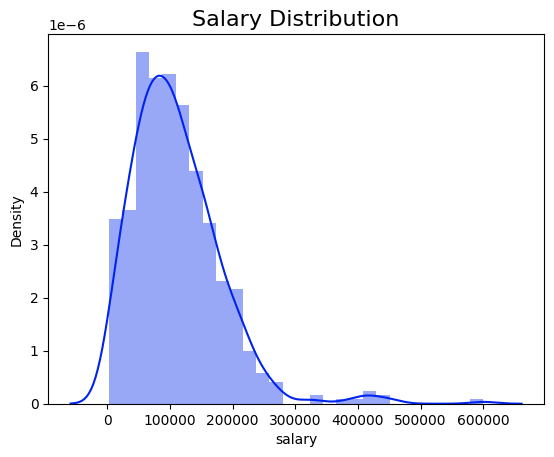

In [34]:
sns.set_palette('winter') 
ax = sns.distplot(df['salary']) 
ax.set_title('Salary Distribution', fontdict={'fontsize': 16}) 

**Few people earn over $300,000**

In [35]:
# mean salary of employees with different experience levels 
mean_s_exp_lv = df.groupby('experience_level')['salary'].mean().sort_values() 
mean_s_exp_lv 


experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary, dtype: float64

Text(0.5, 1.0, 'Experience Level VS Salary')

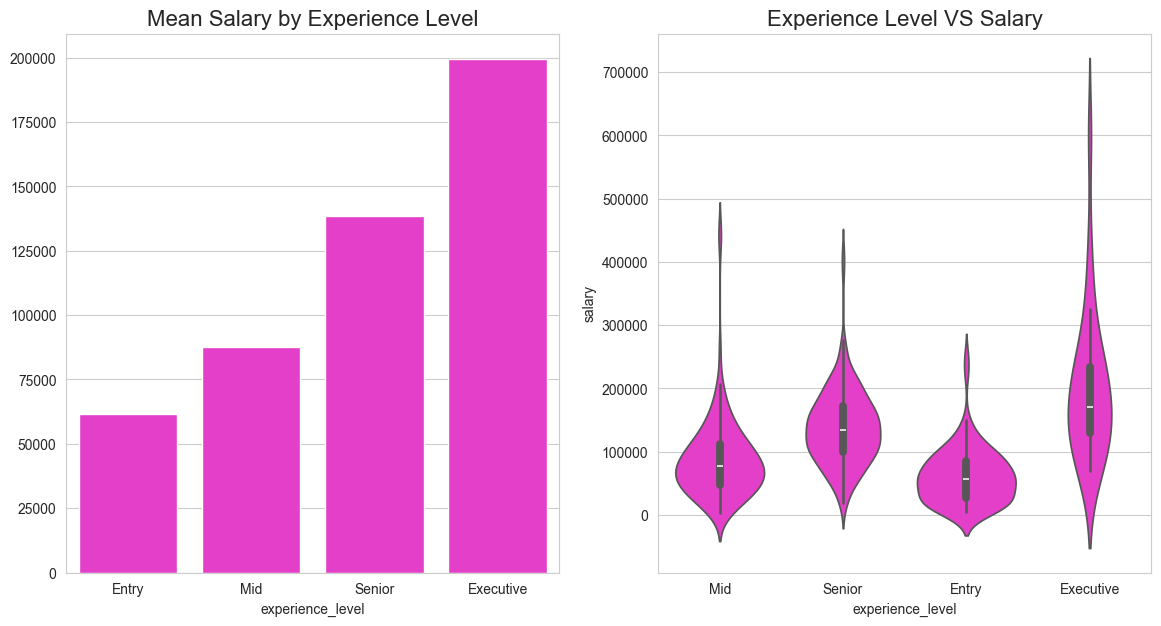

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 7)) 
sns.set_palette('spring') 

plt.subplot(1,2,1)
ax=sns.barplot(x=mean_s_exp_lv.index,y=mean_s_exp_lv.values)
ax.set_title("Mean Salary by Experience Level",fontdict={'fontsize':16})

plt.subplot(1,2,2)
ax=sns.violinplot(data=df,x='experience_level',y='salary')
ax.set_title('Experience Level VS Salary',fontdict={'fontsize': 16})


## **Insights From Above Graph:**
- **💼 Higher experience = higher pay:** Average salary rises from ~$60K (Entry) to ~$200K (Executive).
- **📊 Executive roles vary widely:** Some earn over $700K, showing big differences across companies.
- **📉 Entry-level is tight:** Salaries are consistent, with little variation.
- **🚀 Biggest jump:** Mid to Senior level sees the steepest salary increase



**>>>>>>>Salary VS Employment Type<<<<<<<<**

In [37]:
# mean salary of employees with different employment types 
mens_emp_type=df.groupby('employment_type')['salary'].mean().sort_values()
mens_emp_type

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    111811.838828
Contract     184575.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

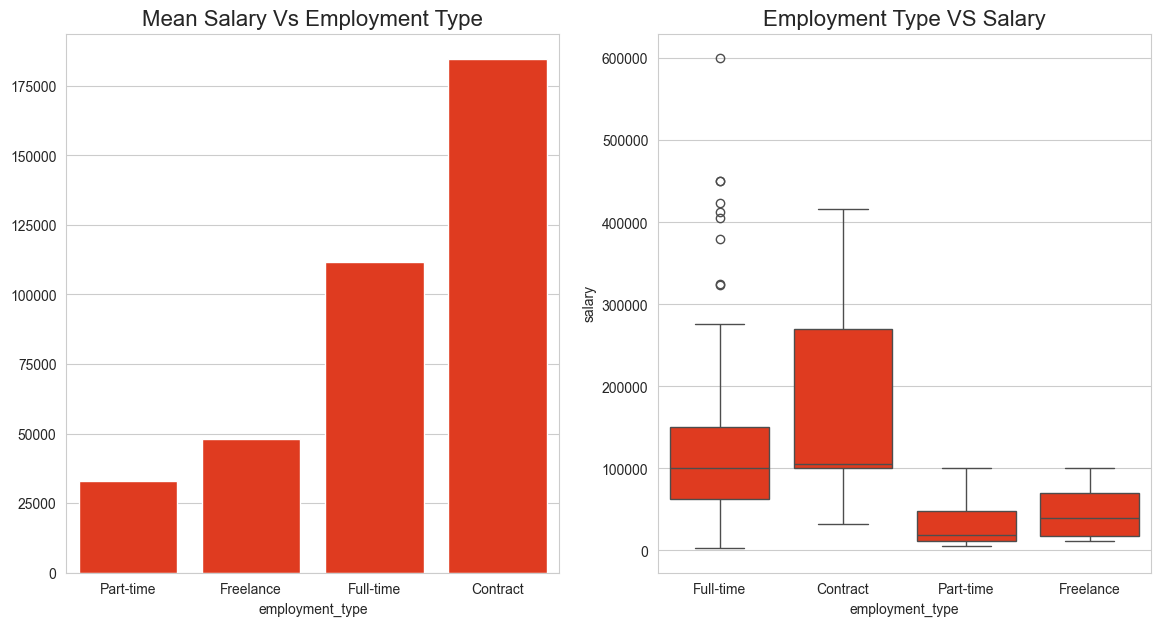

In [38]:
plt.figure(figsize=(14,7))
sns.set_palette('autumn')

plt.subplot(1,2,1)
ax=sns.barplot(x=mens_emp_type.index,y=mens_emp_type.values)
ax.set_title('Mean Salary Vs Employment Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2) 
ax = sns.boxplot(data=df, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize': 16})



## **Insights From Above Graph:**
**- Contract roles** may offer high pay but could lack long-term stability or benefits.<br>
**- Part-time roles** prioritize flexibility, often at the cost of income.<br>
**- This disparity** highlights how employment type significantly influences earning potential, even within the same profession.


## **Salary VS Company Size:**


In [39]:
# mean salary of employees from different company sizes 
mean_comp_size_sal=df.groupby('company_size')['salary'].mean().sort_values()
mean_comp_size_sal


company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

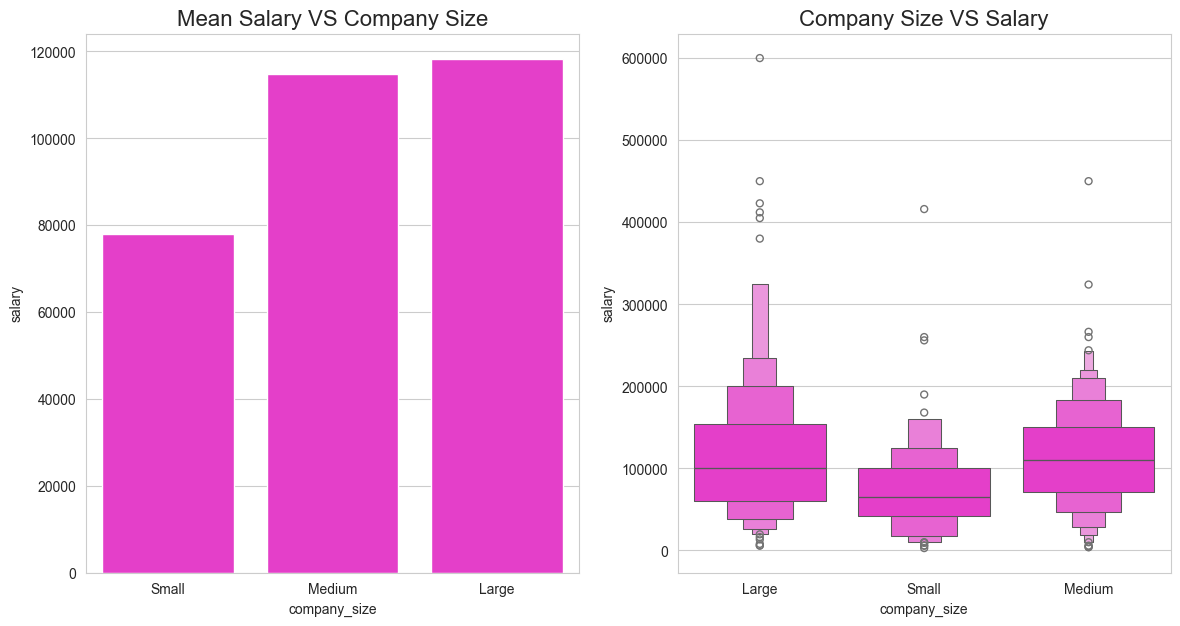

In [40]:
plt.figure(figsize=(14, 7)) 
sns.set_palette('spring')

plt.subplot(1, 2, 1) 
ax = sns.barplot(x=mean_comp_size_sal.index, y=mean_comp_size_sal) 
ax.set_title('Mean Salary VS Company Size', fontdict={'fontsize': 16}) 


plt.subplot(1, 2, 2) 
sns.set_palette('Set2') 
ax = sns.boxenplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize': 16})

## **Insights from Company Size VS Salary:** 
-Data scientists working at **Large companies** are paid the **highest** mean salary, about **$120,000**<br> 
-Those who work at **small** ones have the **lowest** mean salary, about **$75,000** annualy.

## **Salary VS Job type (remote, hybrid, onsite):**



In [41]:
# mean salary of employees with different job types 
mean_s_jtype = df.groupby('job_type')['salary'].mean().sort_values()
mean_s_jtype


job_type
hybrid     80721.897959
onsite    105785.404959
remote    120763.190751
Name: salary, dtype: float64

Text(0.5, 1.0, 'Job Type VS Salary')

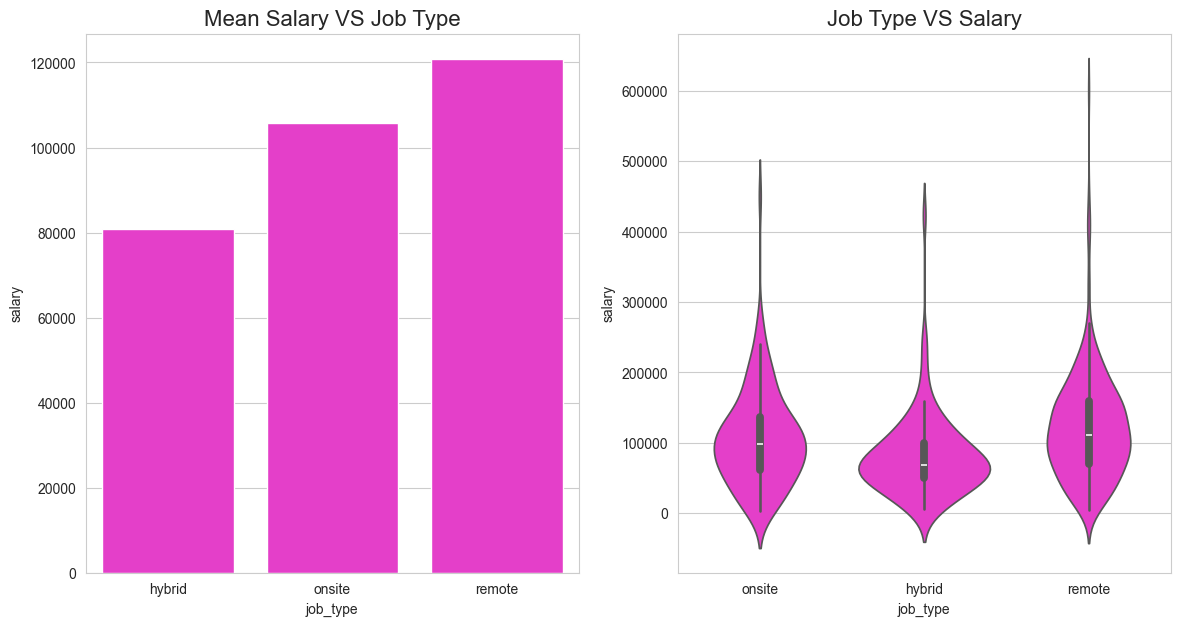

In [42]:
plt.figure(figsize=(14, 7)) 
sns.set_palette('spring') 

plt.subplot(1, 2, 1) 
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype) 
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize': 16}) 
plt.subplot(1, 2, 2) 
ax = sns.violinplot(data=df, x='job_type', y='salary') 
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})


## **Insights from Salary VS Job type:**
**- 🌐 Remote jobs:** Highest average salary ~$120K<br>
**- 🏢 On-site jobs:** Solid pay ~$105K<br>
**- 🏠 Hybrid jobs:** Lowest average ~$80K<br>
**- 📊 Remote** roles also show the widest salary spread, meaning more top-end earning potential


Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

<Figure size 1400x700 with 0 Axes>

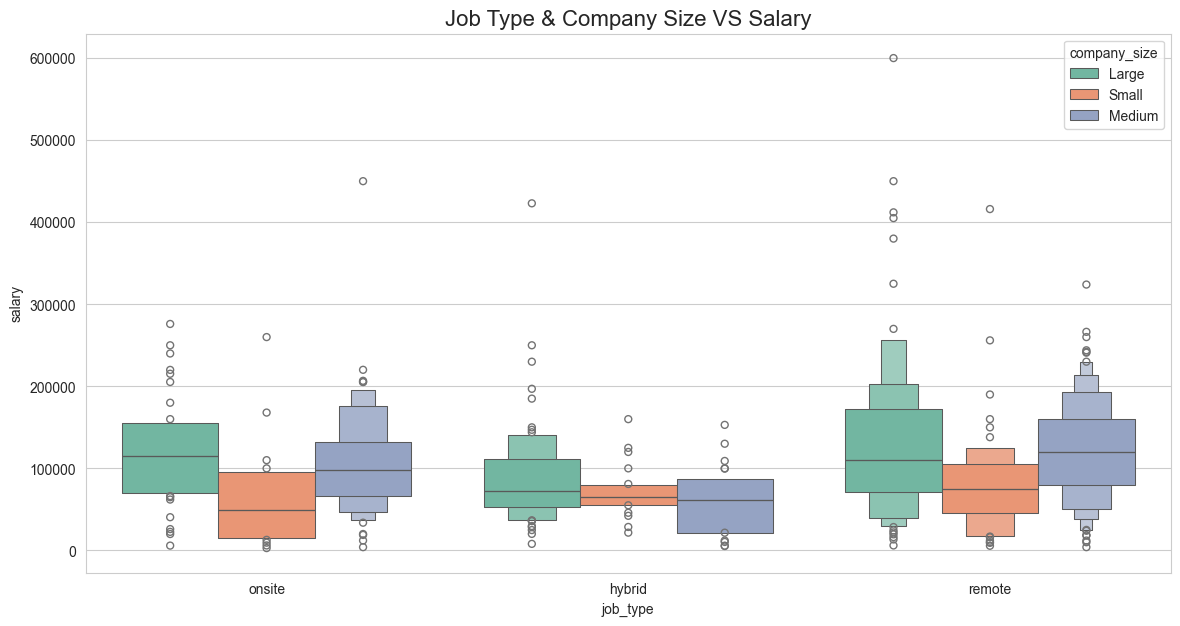

In [43]:
plt.figure(figsize=(14, 7)) 
sns.set_palette('Set2')

# job type and company size VS salary 
plt.figure(figsize=(14, 7)) 
sns.set_palette('Set2') 
ax = sns.boxenplot(data=df, x='job_type', y='salary', hue='company_size') 
ax.set_title('Job Type & Company Size VS Salary',
fontdict={'fontsize': 16}) 


## **Insights from Job Type and Company Size Vs Salary :**
**I would prefer to work remotely at a large company to get paid higher**

## **Job Types and Experience Level distributions (Pie):**

Text(0, 0.5, '')

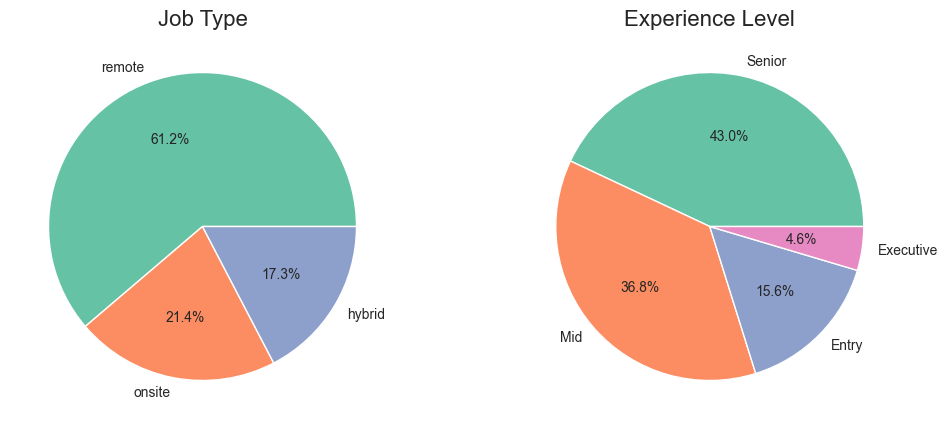

In [48]:
plt.figure(figsize=(12, 5)) 
sns.set_palette('Set2')
# job types 
plt.subplot(1,2,1) 
ax = df['job_type'].value_counts().plot(kind='pie', autopct='%1.1f%%') 
ax.set_title('Job Type', fontdict={'fontsize': 16}) 
ax.set_ylabel('') 


# experience levels 
plt.subplot(1,2,2) 
ax = df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%') 
ax.set_title('Experience Level', fontdict={'fontsize': 16}) 
ax.set_ylabel('')
 



## **Insights from Pie Charts(Job Type,Experience Level):**
**● Remote jobs** have the highest number of openings, %. <br>
**● Share of Job** openings for employees with an experience level of Senior is the the highest here, %. 


## **Top 10 Data Science Roles**

In [ ]:
# top 10 data science roles according to mean salary 
top_10_dsroles=df.groupby('job_title')['salary'].mean().sort_values(ascending=False)

# ignore those ds roles which happened only once
top_ds_roles= pd.Series(data=list(top_10_dsroles.index)).apply(lambda x :x if list(df['job_title']).count(x)>1 else 0)

top_ds_roles_that_happened_gt_1 = top_ds_roles[top_ds_roles != 0][:9] 
top_ds_roles_that_happened_gt_1


1        Principal Data Engineer
2         Financial Data Analyst
3       Principal Data Scientist
4       Director of Data Science
5                 Data Architect
6         Applied Data Scientist
7             Analytics Engineer
9                   Head of Data
10    Machine Learning Scientist
dtype: object

Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

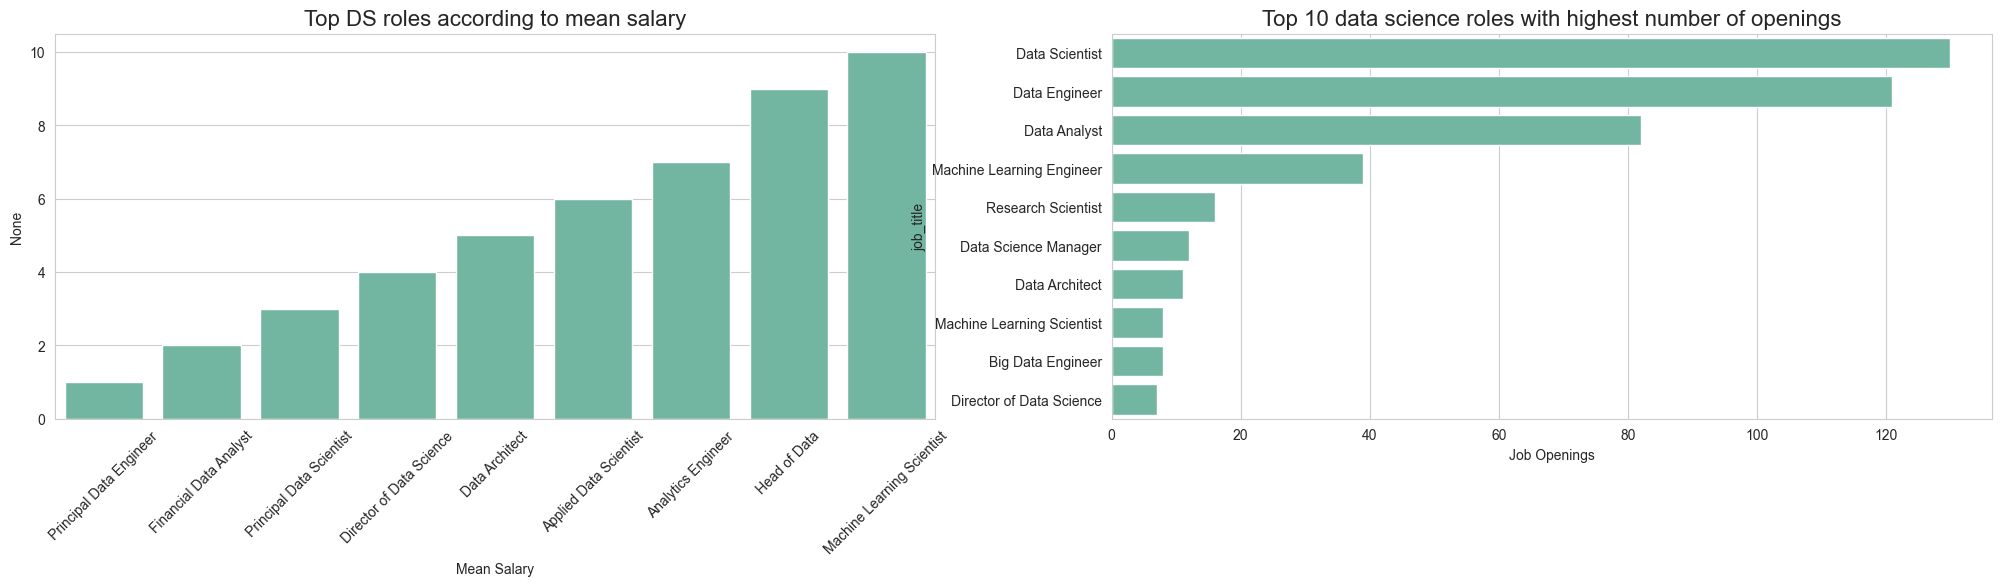

In [58]:
plt.figure(figsize=(25, 5)) 

# top 10 data science roles according to mean salary 
plt.subplot(1, 2, 1)
top_ds_roles = top_ds_roles_that_happened_gt_1
ax = sns.barplot(y=top_ds_roles.index, x=top_ds_roles)
ax.set_xlabel('Mean Salary')
plt.xticks(rotation=45)
ax.set_title('Top DS roles according to mean salary', fontdict={'fontsize': 16}) 

# top 10 data science roles with highest number of openings plt.subplot(1, 2, 2) 
top_dr = df['job_title'].value_counts()[:10] 
plt.subplot(1, 2, 2)
ax = sns.barplot(x=top_dr, y=top_dr.index) 
ax.set_xlabel('Job Openings') 
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16}) 




## **Insights From Above Graph:**
**● Principal Data Engineer, Financial Data Analyst and Principal Data Scientist** are the **highest paid** roles according to this dataset with mean annual salaries of $405,000, $328,333 and $275,000 respectively.<br> 
**● Data Scientist, Data Engineer and Data Analyst** are the top three Data Science roles with **highest number of openings.** 


## **Top 10 campany-locations:**


In [59]:
# top 10 company-locations according to mean salary 
top_cmp_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_locations

company_location
Russia                  157500.000000
United States           144292.993711
New Zealand             125000.000000
Israel                  119059.000000
Japan                   114127.333333
Australia               108042.666667
Canada                  100121.857143
Algeria                 100000.000000
United Arab Emirates    100000.000000
Iraq                    100000.000000
Name: salary, dtype: float64

Text(0.5, 0, 'Job Openings')

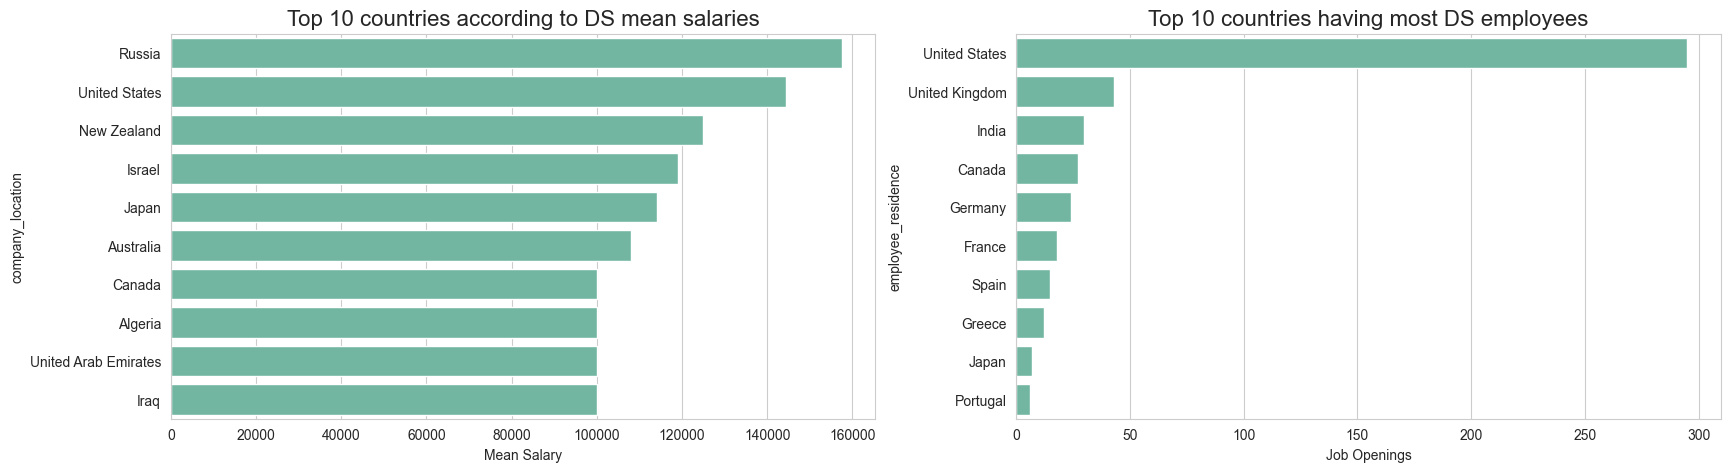

In [66]:
plt.figure(figsize=(20, 5)) 
# top 10 company-locations according to mean salary 
plt.subplot(1, 2, 1) 
ax = sns.barplot(y=top_cmp_locations.index, 
x=top_cmp_locations) 
ax.set_xlabel('Mean Salary') 
ax.set_title('Top 10 countries according to DS mean salaries', fontdict={'fontsize': 16})

# top 10 employee-residence according to number of job openings 
plt.subplot(1,2,2) 
top_er = df['employee_residence'].value_counts()[:10] 
ax = sns.barplot(x=top_er, y=top_er.index) 
ax.set_title('Top 10 countries having most DS employees', fontdict={'fontsize': 16}) 
ax.set_xlabel('Job Openings') 




## **Insights From Above Graph:**
**🌍 Highest Paid Employee-Residences in Data Science (in INR):**<br>
• 	🇲🇾 Malaysia — $200,000 ≈ ₹1.66 crore<br>
• 	🇵🇷 Puerto Rico — $160,000 ≈ ₹1.33 crore<br>
• 	🇺🇸 United States — $149,194 ≈ ₹1.24 crore

**💼 Countries with Most Data Science Jobs:**<br>
• 	🇺🇸 United States — leading in job opportunities<br>
• 	🇬🇧 United Kingdom — strong demand for DS roles<br>
**• 	🇮🇳 India — rapidly growing DS job market**


**>>>>>>Company Size VS Job Types Counts:<<<<<<<**

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

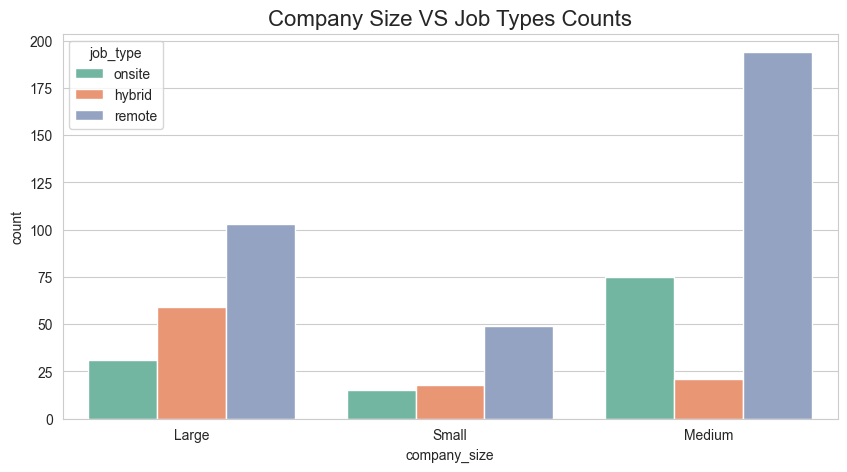

In [68]:
plt.figure(figsize=(10, 5)) 
sns.set_palette('Set2') 
ax = sns.countplot(data=df, x='company_size', hue='job_type') 
ax.set_title('Company Size VS Job Types Counts', 
fontdict={'fontsize': 16}) 
